In [1]:
# -*- coding: UTF-8 -*-

# Render our plots inline
%matplotlib inline 

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

In [2]:
# Download and clean from OECD: 
# Demographic Statistics_TL3: Regional typology (urban=1/intermediate=2/rural=3,4,5)

In [3]:
# Load csv file first
regional = pd.read_csv("OECD-Regional-Well-Being-Data-File_last_score.csv", encoding="utf-8")

In [4]:
regional

,Country,Region,Region Code,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction
0,Australia,New South Wales,AU1,8,8.1,6.8,8.8,9.0,9.8,10.0,7.2,7.2,8.9,7.8
1,Australia,Victoria,AU2,8.1,7.9,5.9,9.5,9.5,8.6,10.0,7.5,7.8,9.3,8.5
2,Australia,Queensland,AU3,7.8,8.1,6.3,9.5,8.3,9.9,10.0,7.7,8.3,8.6,8.1
3,Australia,South Australia,AU4,7.3,7.8,6.1,9.0,8.5,9.4,10.0,7.2,8.3,8.6,8.5
4,Australia,Western Australia,AU5,7.6,8.8,7.9,8.6,9.3,9.6,10.0,7.8,8.9,8.5,7.8
5,Australia,Tasmania,AU6,6.5,7.6,5.4,8.8,5.4,10.0,10.0,6.8,8.3,8.6,9.6
6,Australia,Northern Territory,AU7,8.1,8.7,8.2,0.0,2.4,9.2,8.4,7.8,5.6,10,7
7,Australia,Australian Capital Territory,AU8,9.5,9.3,10.0,10.0,9.3,9.1,10.0,8.7,8.3,9.8,9.6
8,Austria,Burgenland,AT11,8.8,7.8,5.7,9.7,6.7,3.5,8.6,8.0,6.1,8.3,7.8
9,Austria,Lower Austria,AT12,8.5,8.2,5.9,9.8,6.6,2.6,8.1,7.4,5.6,7.8,8.1


In [5]:
#regional.replace(np.nan, 0)
regional = regional.fillna(0)

In [6]:
regional.dtypes

Country                      object
Region                       object
Region Code                  object
Education                    object
Jobs                        float64
Income                      float64
Safety                      float64
Health                      float64
Environment                 float64
Civic engagement            float64
Accessiblity to services    float64
Housing                      object
Community                    object
Life satisfaction            object
dtype: object

In [7]:
columns = list(regional.columns.values)
for r, i in enumerate(regional.iterrows()):
    for k,j in enumerate(i[1]):
        if k > 2:
            try:
                val = np.float64(j)
                regional.set_value(r, columns[k], val)
            except Exception as e:
                print "no", e, k, r, columns[k], regional.iloc[r][columns[k]]
                print j
                print regional.iloc[r][columns[k]]
                regional.set_value(r, columns[k], 0)
                print regional.iloc[r][columns[k]]

no could not convert string to float: .. 3 30 Education ..
..
..
0
no could not convert string to float: .. 12 30 Community ..
..
..
0
no could not convert string to float: .. 13 30 Life satisfaction ..
..
..
0
no could not convert string to float: .. 3 31 Education ..
..
..
0
no could not convert string to float: .. 12 31 Community ..
..
..
0
no could not convert string to float: .. 13 31 Life satisfaction ..
..
..
0
no could not convert string to float: .. 3 32 Education ..
..
..
0
no could not convert string to float: .. 12 32 Community ..
..
..
0
no could not convert string to float: .. 13 32 Life satisfaction ..
..
..
0
no could not convert string to float: .. 11 46 Housing ..
..
..
0
no could not convert string to float: .. 11 47 Housing ..
..
..
0
no could not convert string to float: .. 12 70 Community ..
..
..
0
no could not convert string to float: .. 13 70 Life satisfaction ..
..
..
0


In [8]:
for r, i in enumerate(regional.iterrows()):
    for k,j in enumerate(i[1]):
        if k > 2:
            print regional.iloc[r][columns[k]], type(regional.iloc[r][columns[k]])

8.0 <type 'numpy.float64'>
8.1 <type 'numpy.float64'>
6.8 <type 'numpy.float64'>
8.8 <type 'numpy.float64'>
9.0 <type 'numpy.float64'>
9.8 <type 'numpy.float64'>
10.0 <type 'numpy.float64'>
7.2 <type 'numpy.float64'>
7.2 <type 'numpy.float64'>
8.9 <type 'numpy.float64'>
7.8 <type 'numpy.float64'>
8.1 <type 'numpy.float64'>
7.9 <type 'numpy.float64'>
5.9 <type 'numpy.float64'>
9.5 <type 'numpy.float64'>
9.5 <type 'numpy.float64'>
8.6 <type 'numpy.float64'>
10.0 <type 'numpy.float64'>
7.5 <type 'numpy.float64'>
7.8 <type 'numpy.float64'>
9.3 <type 'numpy.float64'>
8.5 <type 'numpy.float64'>
7.8 <type 'numpy.float64'>
8.1 <type 'numpy.float64'>
6.3 <type 'numpy.float64'>
9.5 <type 'numpy.float64'>
8.3 <type 'numpy.float64'>
9.9 <type 'numpy.float64'>
10.0 <type 'numpy.float64'>
7.7 <type 'numpy.float64'>
8.3 <type 'numpy.float64'>
8.6 <type 'numpy.float64'>
8.1 <type 'numpy.float64'>
7.3 <type 'numpy.float64'>
7.8 <type 'numpy.float64'>
6.1 <type 'numpy.float64'>
9.0 <type 'numpy.float64'

In [17]:
print regional.iloc[31]["Education"]
print type(regional.iloc[31]["Education"])

0
<type 'int'>


In [23]:
# convert everything to numbers
test = regional.apply(lambda x: pd.to_numeric(x, errors='ignore'))

In [25]:
test.dtypes

Country                      object
Region                       object
Region Code                  object
Education                   float64
Jobs                        float64
Income                      float64
Safety                      float64
Health                      float64
Environment                 float64
Civic engagement            float64
Accessiblity to services    float64
Housing                     float64
Community                   float64
Life satisfaction           float64
dtype: object

In [26]:
regional = test.fillna(0)

In [29]:
regional.dtypes

Country                      object
Region                       object
Region Code                  object
Education                   float64
Jobs                        float64
Income                      float64
Safety                      float64
Health                      float64
Environment                 float64
Civic engagement            float64
Accessiblity to services    float64
Housing                     float64
Community                   float64
Life satisfaction           float64
dtype: object

In [30]:
national = regional.groupby(['Country'], as_index=False)

In [31]:
national.mean()

,Country,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction
0,Australia,7.862500,8.287500,7.075000,8.025000,7.712500,9.450000,9.800000,7.587500,7.837500,9.037500,8.362500
1,Austria,8.566667,8.066667,5.655556,9.711111,7.377778,3.266667,6.500000,7.866667,5.322222,8.477778,8.133333
2,Belgium,7.433333,4.600000,4.466667,7.233333,6.166667,2.466667,9.900000,7.966667,7.433333,7.966667,6.800000
3,Canada,6.900000,6.600000,5.623077,6.884615,5.884615,8.461538,5.361538,8.100000,8.146154,6.169231,6.830769
4,Chile,7.246667,6.786667,0.900000,5.480000,3.573333,7.900000,0.446667,1.153333,1.533333,4.686667,5.706667
5,Czech Republic,9.912500,7.525000,2.500000,7.887500,3.037500,1.900000,2.962500,7.337500,2.775000,6.562500,5.012500
6,Denmark,7.000000,8.080000,3.960000,9.680000,5.880000,6.080000,9.220000,8.640000,5.240000,9.700000,9.260000
7,Estonia TL3,9.240000,7.000000,1.420000,4.760000,1.640000,6.720000,3.500000,7.400000,2.160000,6.100000,1.260000
8,Finland,8.540000,7.400000,4.360000,9.720000,7.320000,7.980000,4.580000,8.520000,5.800000,7.080000,7.120000
9,France,7.818182,5.531818,4.895455,8.754545,8.431818,5.286364,8.227273,7.318182,5.268182,8.077273,5.818182


In [32]:
national.mean().to_csv("national.csv", encoding="utf-8")

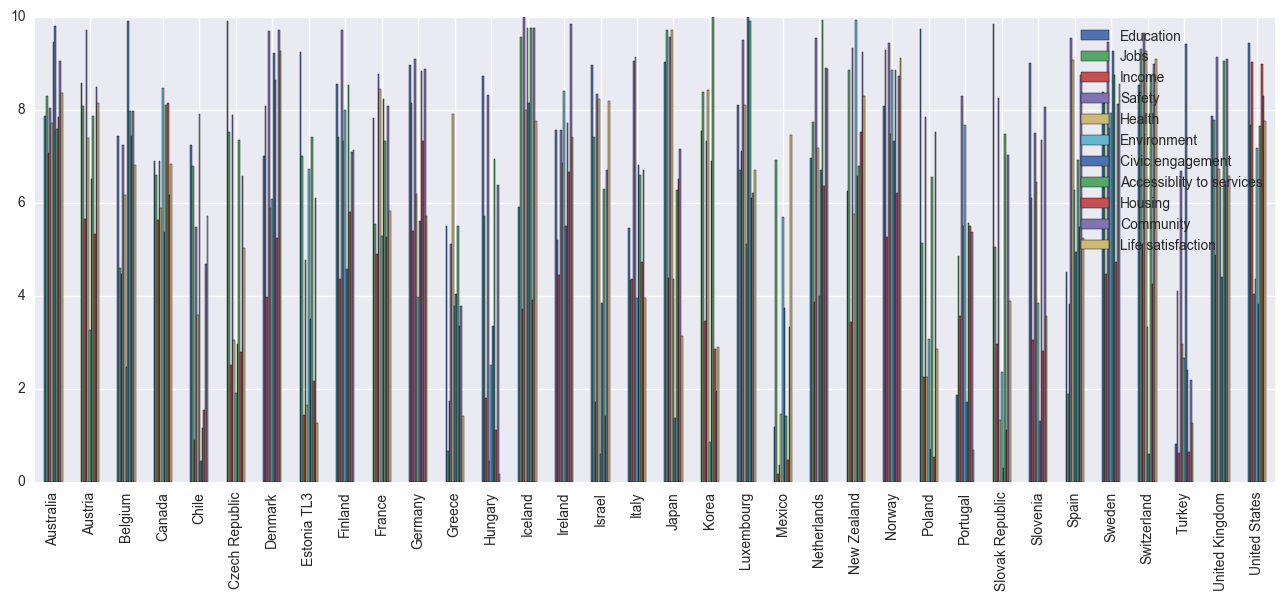

In [33]:
ax = national.mean().plot(kind="bar", figsize=[16,6])
ax.set_xticklabels(list(national.mean()['Country']))

In [34]:
regional.to_csv("regional.csv", encoding="utf-8")